# BPL_YEAST_AIR_Fedbatch demo

This notebook demonstrate yeast fedbatch cultivation. We look at impact of changes in the glucose feeding. We also take a look at tuning of the DO-control system. Both liquid- and gasphase are included in the model. 

Interaction with the compiled model as FMU is mainly through the simplified commands: par(), init(), newplot(), simu() etc. The last simulation is always available in the workspace and called 'sim_res'. The command describe() brings mainly up description infomration from the actual Modelica code from the FMU but is complemented with information given in the dedicated Python setup-file.

The idea is to demonstrate how simulations and varyiing conditions can provide some process insight that can support the experimetnal work. I hope that at the end of this session you are ready to formulate your own questions you want to address with simulations - and you can just go on in this notebook! Just press the field "+Code" in the upper left part of notebook interface and you get a new "cell" where you write your own code. You can copy and paste from cells above using ctrol-c and ctrl-p as usual and edit the cell. When your are ready to execute the cell just press the "play button" to the left in the cell or press shift-enter as in "ordinary" Jupyter notebooks.

After a session you may want to save your own notebook. That you can do on your Google Drive account and I refer to Colab instructions for how to do this. It is easy. 

Enjoy!

In [1]:
run -i BPL_YEAST_AIR_Fedbatch_DOcontrol_explore.py

Windows - run FMU pre-compiled JModelica 2.14

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values / units

Note that both disp() and describe() takes values from the last simulation

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [2]:
plt.rcParams['figure.figsize'] = [36/2.54, 30/2.54]

## About the process model

In [3]:
describe('culture'); print(); describe('liquidphase'); print(); describe('gasphase')

Saccharomyces cerevisae - default parameters for strain H1022

Reactor broth substances included in the model

Cells   index       =  1 - molecular weight =  24.6 Da
Glucose index       =  2 - molecular weight =  180.0 Da
Ethanol index       =  3 - molecular weight =  46.0 Da
Dissolved O2 index  =  4 - molecular weight =  32.0 Da
Dissolved CO2 index =  5 - molecular weight =  44.0 Da

Reactor gasphase substances included in the model

N2 etc index  =  1 - molecular weight =  28.0 Da
O2 index      =  2 - molecular weight =  32.0 Da
CO2 index     =  3 - molecular weight =  44.0 Da
Ethanol index =  4 - molecular weight =  46.0 Da


In [19]:
describe('bioreactor.V_gas[1]')

Gas substance volume : 1.323 [ L ]


## First simulations - adjusting start of substrate feeding

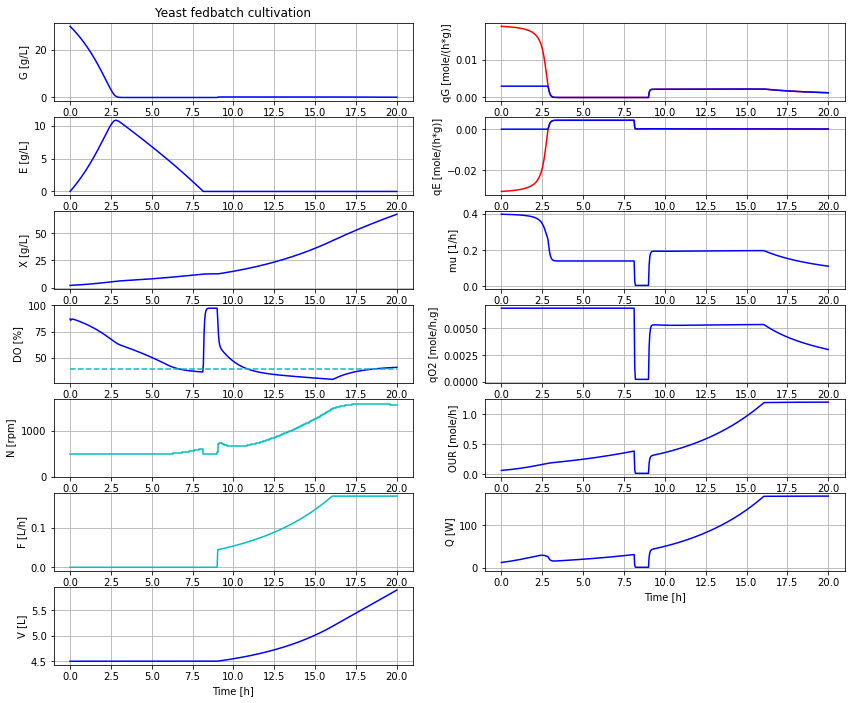

In [5]:
# Culture parameters and others at default values
par(qO2lim=0.0069) 

# Process initial conditions
init(V_0=4.5, VG_0=4.5*30, VX_0=4.5*2, VE_0=4.5*0) 

# Feed profile
par(t_start=9, F_start=0.044, mu_feed=0.20, F_max=0.18)  

# DO-control parameters
par(samplePeriod=1/60, K=10, Ti=0.5, I_0=500)   

# Simulate and plot
newplot(title='Yeast fedbatch cultivation', plotType='Overview')
simu(20)

In [6]:
disp('dosage', decimals=4)

mu_feed : 0.2
F_0 : 0.0
t_start : 9.0
F_start : 0.044
F_max : 0.18


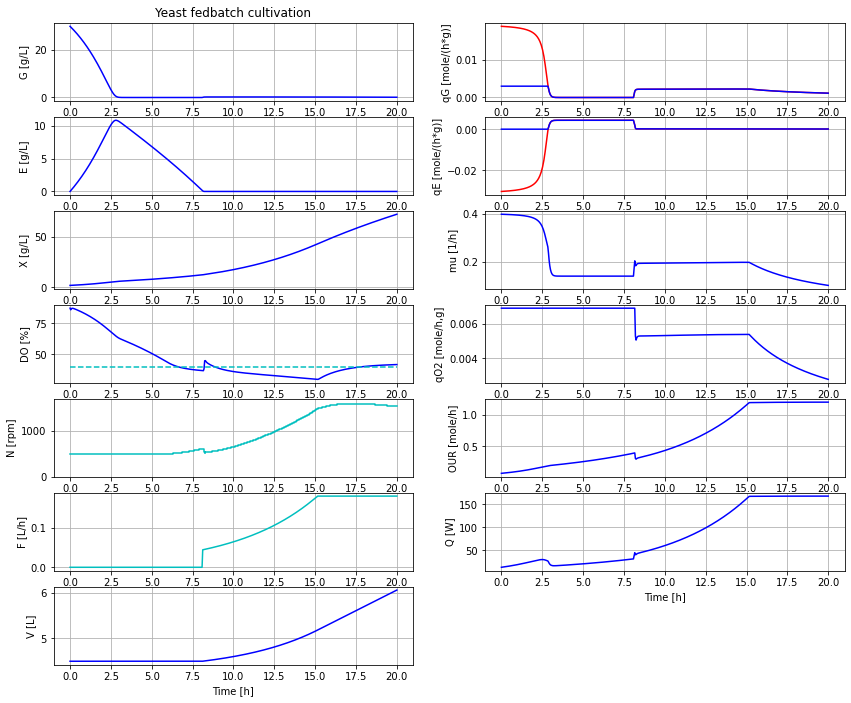

In [7]:
# Let us start the feeding just after the batch phase has ended and keep other parameters the same
par(t_start=8.1)

# Simulate and plot
newplot(title='Yeast fedbatch cultivation', plotType='Overview')
simu(20)

The increase of DO to about 50 % at end of batch phase should be possible to detect easily. This simulation is more realistic and we use these settings from now on.

## DO-control  - tuning of PI-regulator parameters

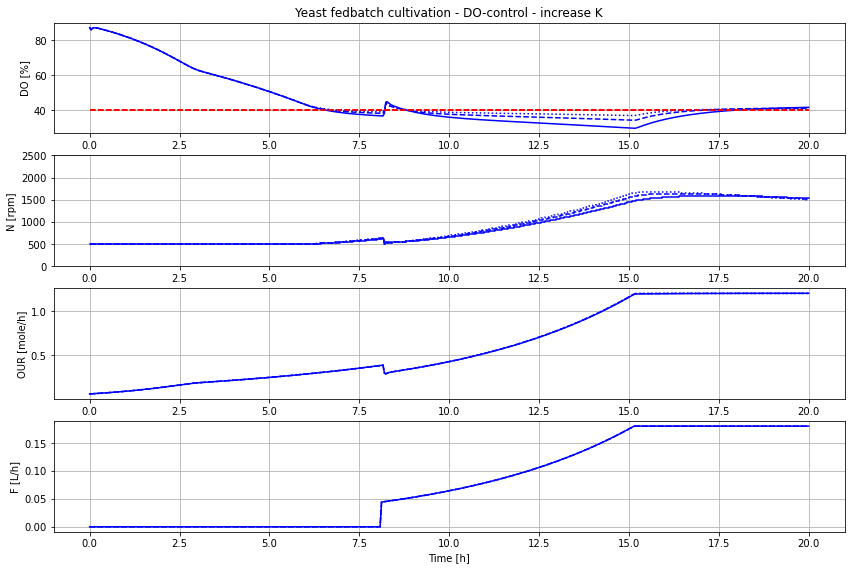

In [8]:
# Let us take a closer look at the DO-control system and try to make control error smaller by increaseing K
newplot(title='Yeast fedbatch cultivation - DO-control - increase K', plotType='Focus DO-control')
for value in [10, 20, 40]: par(K=value); simu(20)

# Reset K to the original value
par(K=10)

We see that by a higher control gain K the DO-control error get smaller and the stability of the control system is maintained.

## Sensitivity to changes in feed-profile

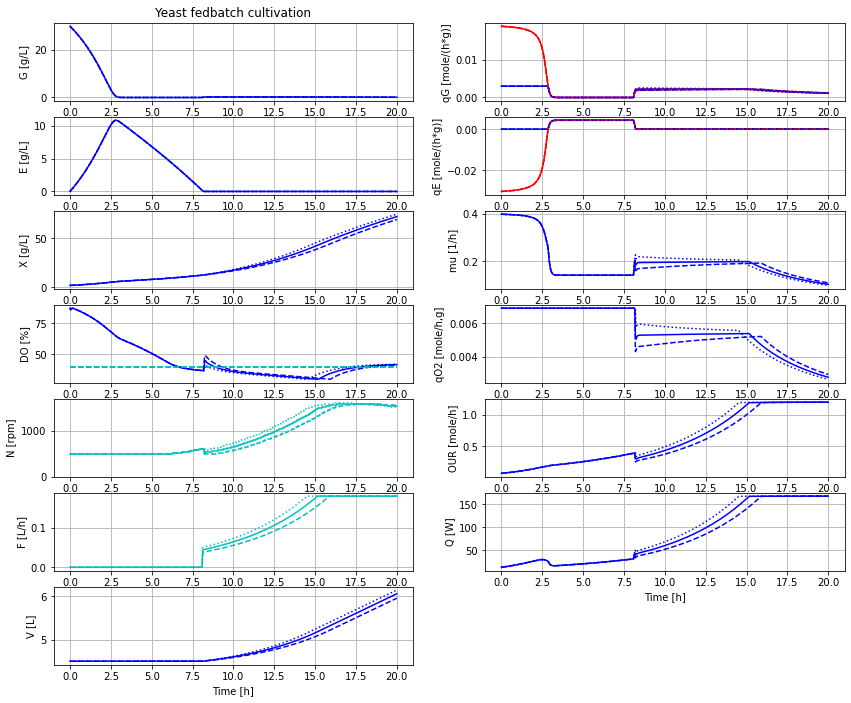

In [9]:
# Let us check the sensitivity to changes in the feed profile design
newplot(title='Yeast fedbatch cultivation', plotType='Overview')
for value in [0.044, 0.038, 0.050]: par(F_start=value); simu(20)

The variation in F_start has an impact and we see that the actual growth rate during fedbatch phase do converge to the set growth rate of the feed, but i takes more than 5 hours.

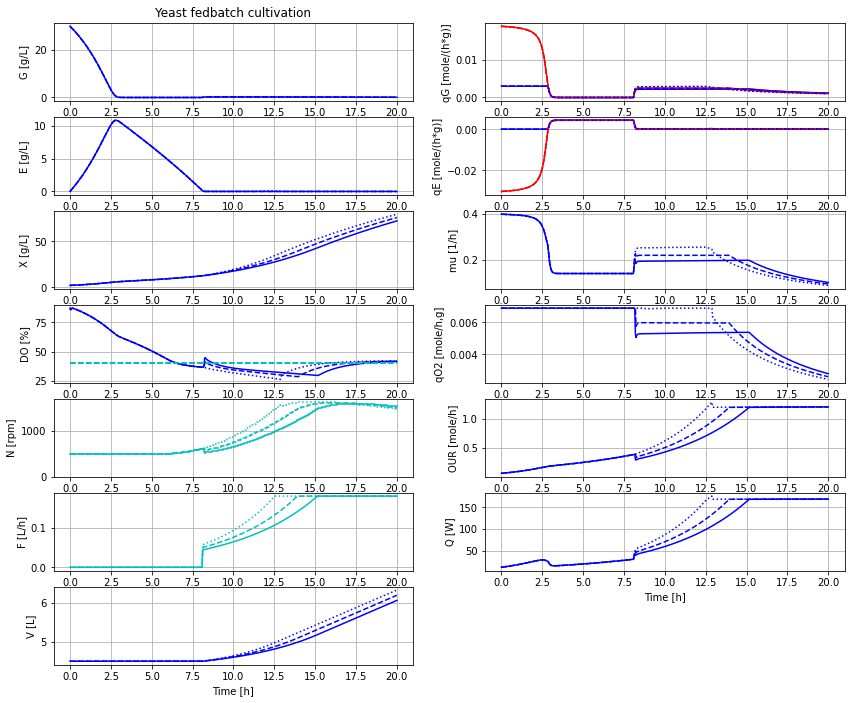

In [10]:
# Let us investigate a feedprofile that is closer to the maximal capacity
newplot(title='Yeast fedbatch cultivation', plotType='Overview')
par(F_start=0.044, mu_feed=0.20); simu(20)
par(F_start=0.050, mu_feed=0.22); simu(20)
par(F_start=0.057, mu_feed=0.26); simu(20)

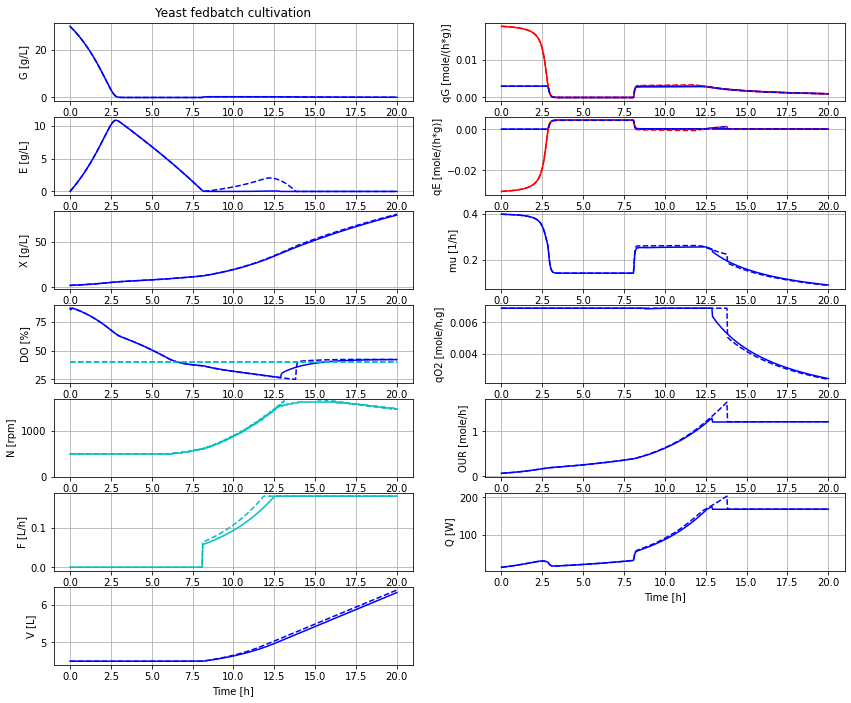

In [11]:
# And let us see what happens if the feedprofile exceed the culture capacity
newplot(title='Yeast fedbatch cultivation', plotType='Overview')
par(F_start=0.057, mu_feed=0.26); simu(20)
par(F_start=0.063, mu_feed=0.28); simu(20)
par(F_start=0.044, mu_feed=0.20)

Note that with the feedprofile that exceed culture respiratory capacity, ethanol is accumulated during time 8-12.5 hours. When the feedprofile then is constant from time 12.5 hours and on, then the accumulated ethanol is consumed over about an hour. This leads to a higher oxygen demand and heat production during this time. The specific cell growth rate is also slightly higher during this period.

## Make your own diagrams - visualize relation qO2 vs qG

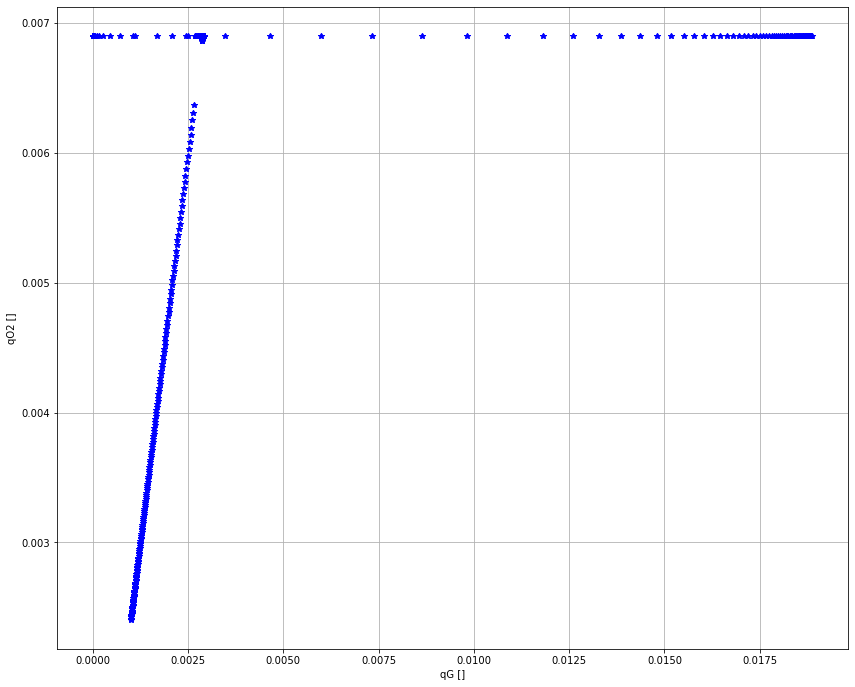

In [12]:
# Improvise and make your own diagram - study the relation qO2 vs qG(G) 
plt.figure()
ax1 = plt.subplot(1,1,1)
ax1.set_ylabel('qO2 []')
ax1.set_xlabel('qG []')
ax1.grid()

setLines()

diagrams.clear()
diagrams.append("ax1.plot(sim_res['bioreactor.culture.qGm'], sim_res['bioreactor.culture.qO2'], 'b*')")

par(F_start=0.057, mu_feed=0.26); simu(20)
simu(20)

During the cultivation we have a number of data points for qG and qO2 at the same time, during different conditions. What we see in the diagram is that qO2 increase with qG until qG reach a level of just above 0.0025 and then qO2 saturats for highter qG. This what expect to see.

We also see that for lower qG we have also qO2 values at saturation level. This points correspond to a situation where ethanol is consumed with the remaining respiratory capacity. Glucose is consumed by priority.

## Summary
* We have first seen an overview diagram of a typical yeast fedbatch cultivation where the feed started about an hour after the batch phase was finished. A new simulation was made where the feed started directly after detection of lack of substrate.
* We also took a look at the DO-control system and saw that we could decrease the control error by increasing the PI-controller gain. Stability of the control system remained.
* Then we tested variations in the feed dosage scheme and investigated the possibilities to increae the production.
* We also saw what happens if the feed dosage exceed the culture respiratory capacity and what to look for during the experimental work.
* Finally we wanted to confirm our understanding of the relation between qO2 and qG and could easily make an improvised diagram to show this using data from the standard simulation.

In [13]:
# List of components in the process setup and also a couple of other things like liquidphase and gasphase etc
describe('parts')

['airFlow_setpoint', 'airtube', 'atmosphere', 'bioreactor', 'bioreactor.culture', 'bioreactor.gas_liquid_transfer', 'compressor', 'DO_setpoint', 'dosagescheme', 'DOsensor', 'feedtank', 'gasphase', 'liquidphase', 'MSL', 'N_high', 'N_low', 'PIreg', 'pump']


In [14]:
system_info()


System information
 -OS: Windows
 -Python: 3.9.5
 -PyFMI: 2.9.5
 -FMU by: JModelica.org
 -FMI: 2.0
 -Type: FMUModelCS2
 -Name: BPL_YEAST_AIR.Fedbatch_DOcontrol
 -Generated: 2022-08-19T11:13:22
 -MSL: 3.2.2 build 3
 -Description: Bioprocess Library version 2.1.0 beta
 -Interaction: FMU-explore ver 0.9.2
